In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/cv2/*
    /usr/local/lib/python3.8/dist-packages/opencv_python-4.6.0.66.dist-info/*
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.8/dist-packages/opencv_python.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.8/d

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
!wget wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Cf1LASZwmN5K0WrXqclAsoyNGxQR4_Fj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Cf1LASZwmN5K0WrXqclAsoyNGxQR4_Fj" -O img.jpg && rm -rf /tmp/cookies.txt

--2023-02-07 13:04:12--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-02-07 13:04:12--  https://docs.google.com/uc?export=download&confirm=&id=1Cf1LASZwmN5K0WrXqclAsoyNGxQR4_Fj
Resolving docs.google.com (docs.google.com)... 142.251.16.138, 142.251.16.139, 142.251.16.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pi8jdb3ed16tmdt6pfkkctrjodtphigh/1675775025000/04268100670184909597/*/1Cf1LASZwmN5K0WrXqclAsoyNGxQR4_Fj?e=download&uuid=c09def9d-fc8c-4ecb-80b3-62b58cf7acce [following]
--2023-02-07 13:04:12--  https://doc-10-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pi8jdb3ed16tmdt6pfkkctrjodtphigh/1675775025000/04268100670184909597/*/1Cf1LASZwmN5K0WrXqclAsoyNGxQR4_Fj?e=download&uuid=c

In [ ]:
def show_img(*args, figsize=10, is_gray=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    cmap=None
    if not is_gray:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    else:
        cmap = 'gray'
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        
        plt.imshow(images[i-1], cmap=cmap)
        plt.axis('off')

In [ ]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
def harris(img, window_size, alpha ,threshold):

    gray_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    gauss = cv2.GaussianBlur(img,(3,3),0)

    height = img.shape[0]
    width = img.shape[1]
    result = np.zeros((height,width))
    
    Ix = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gauss, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = np.square(Ix)
    Iyy = np.square(Iy)
    Ixy = Ix * Iy

    index = int(window_size/2)

    for y in range(index, height-index):
        for x in range(index, width-index):
            WIxx = np.sum(Ixx[y-index:y+1+index, x-index:x+1+index])
            WIyy = np.sum(Iyy[y-index:y+1+index, x-index:x+1+index])
            WIxy = np.sum(Ixy[y-index:y+1+index, x-index:x+1+index])

            M = np.array([[WIxx,WIxy],[WIxy,WIyy]])

            det = np.linalg.det(M)
            trace = np.matrix.trace(M)
            R = det - alpha*(trace**2)

            result[y-index, x-index]=R
    
    cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX)

    for x in range(index, height-index):
        for y in range(index, width-index):
            value = result[x, y]

            if value > threshold:
                cv2.circle(gray_bgr, (y, x), radius=2, color=(0,255,0), thickness=-1)


    return gray_bgr


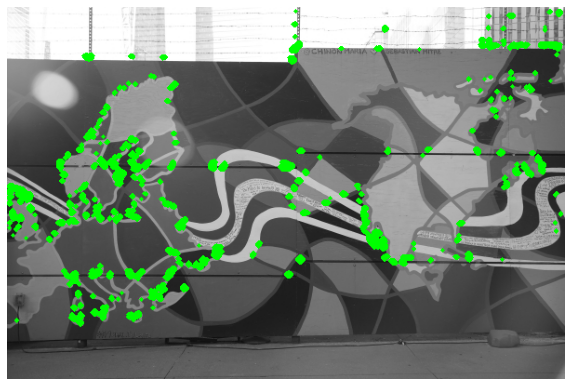

In [ ]:
scale_1 = harris(img, 5, 0.04, 0.18)
show_img(scale_1)
plt.show()

In [ ]:
def rotate(img, angle):
    center = img.shape[1]//2, img.shape[0]//2
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return rotated

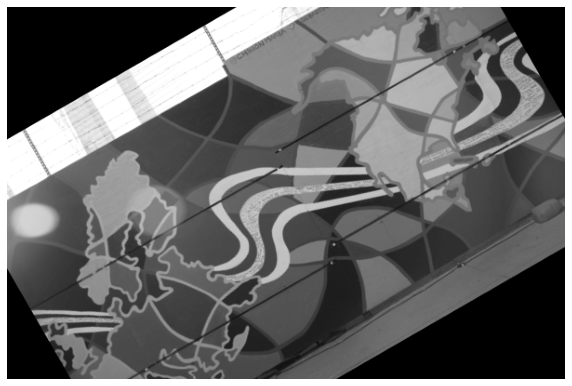

In [ ]:
rotated_1 = rotate(img, 30)
show_img(rotated_1)
plt.show()

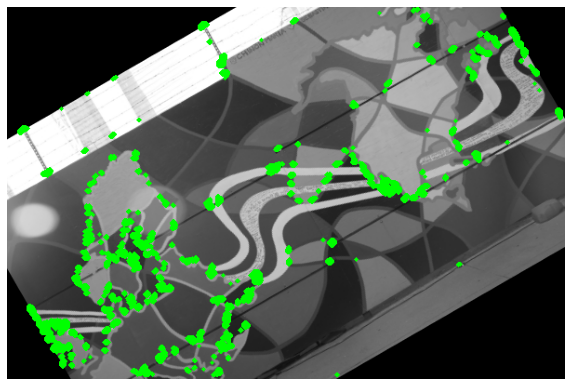

In [ ]:
scale_2 = harris(rotated_1, 5, 0.04, 0.512)
show_img(scale_2)
plt.show()

In [ ]:
def scale(img, scale):
    center = img.shape[1]//2, img.shape[0]//2
    M = cv2.getRotationMatrix2D(center, 0, scale)
    scaled = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return scaled

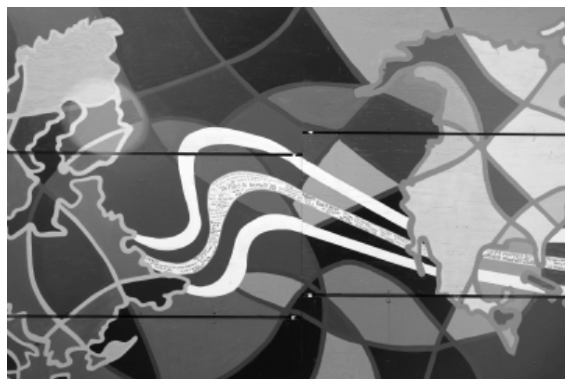

In [ ]:
scaled_1 = scale(img, 1.5)
show_img(scaled_1)
plt.show()

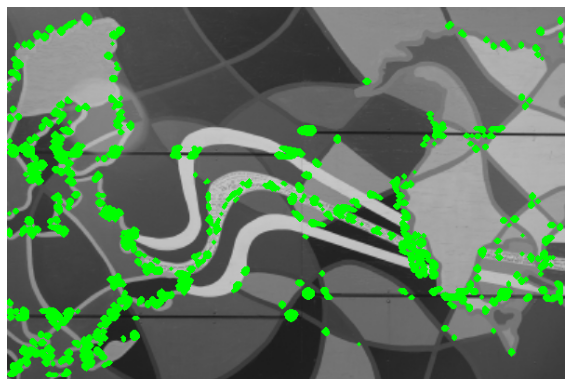

In [ ]:
scale_3 = harris(scaled_1, 5, 0.04, 0.33)
show_img(scale_3)
plt.show()

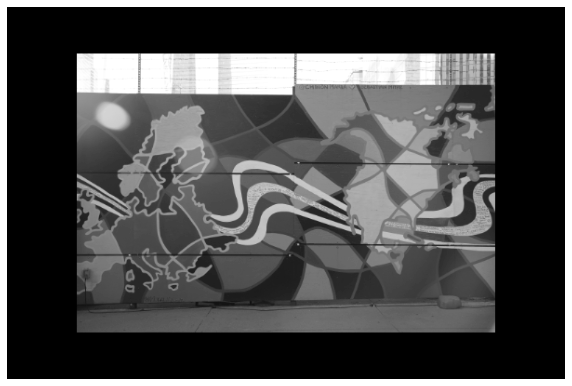

In [ ]:
scaled_2 = scale(img, 0.75)
show_img(scaled_2)
plt.show()

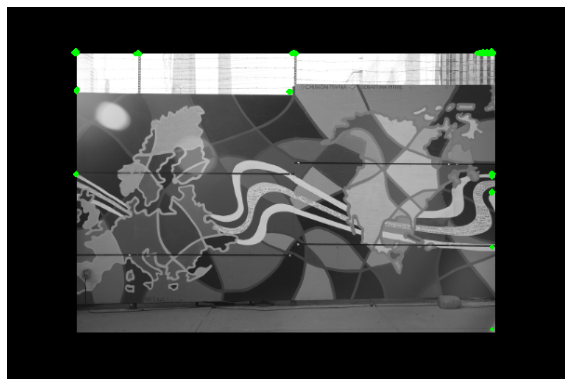

In [ ]:
scale_4 = harris(scaled_2, 5, 0.04, 0.18)
show_img(scale_4)
plt.show()

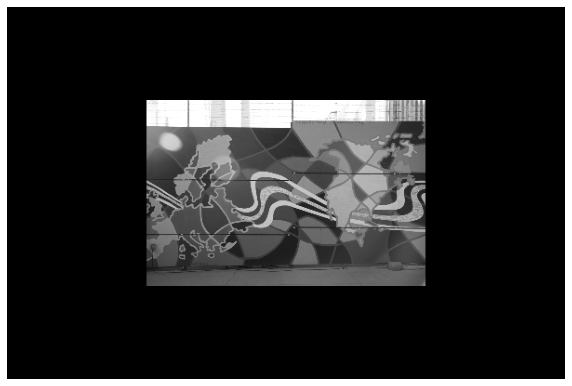

In [ ]:
scaled_3 = scale(img, 0.5)
show_img(scaled_3)
plt.show()

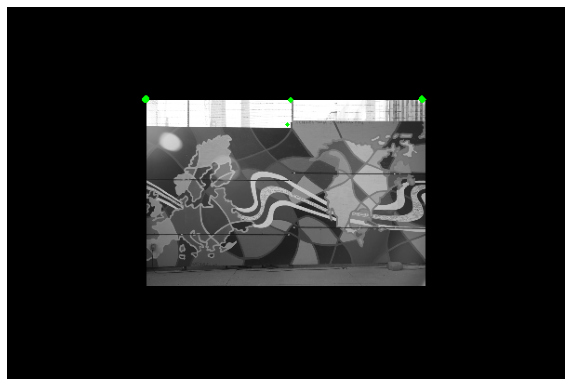

In [ ]:
scale_5 = harris(scaled_3, 5, 0.04, 0.3)
show_img(scale_5)
plt.show()

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZD4raXOtq8dOWqcoF_gidFe0UGf6TZRB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZD4raXOtq8dOWqcoF_gidFe0UGf6TZRB" -O features.zip && rm -rf /tmp/cookies.txt

--2023-02-07 13:04:49--  https://docs.google.com/uc?export=download&confirm=&id=1ZD4raXOtq8dOWqcoF_gidFe0UGf6TZRB
Resolving docs.google.com (docs.google.com)... 172.253.115.102, 172.253.115.101, 172.253.115.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u3a8o8bbhakruc3l49rgjap89krmt9he/1675775025000/04268100670184909597/*/1ZD4raXOtq8dOWqcoF_gidFe0UGf6TZRB?e=download&uuid=15a13e04-b3d0-4e07-b090-000a62ae6fb6 [following]
--2023-02-07 13:04:49--  https://doc-08-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u3a8o8bbhakruc3l49rgjap89krmt9he/1675775025000/04268100670184909597/*/1ZD4raXOtq8dOWqcoF_gidFe0UGf6TZRB?e=download&uuid=15a13e04-b3d0-4e07-b090-000a62ae6fb6
Resolving doc-08-8g-docs.googleusercontent.com (doc-08-8g-docs.googleusercontent.com)... 142.251.167.1

In [ ]:
!unzip -n features.zip

Archive:  features.zip
  inflating: sl.jpg                  
  inflating: sm.jpg                  
  inflating: sr.jpg                  


In [ ]:
sl = cv2.imread('sl.jpg')
sm = cv2.imread('sm.jpg')
sr = cv2.imread('sr.jpg')

In [ ]:
def match(img1, img2):
    sift = cv2.SIFT_create(300)
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append([m])

    result = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_DEFAULT)
    return result, (good_matches, kp1, kp2)

In [ ]:
a1, _ = match(sl, sm)
a2, _ = match(sm, sr)
a3, _ = match(sl, sr)

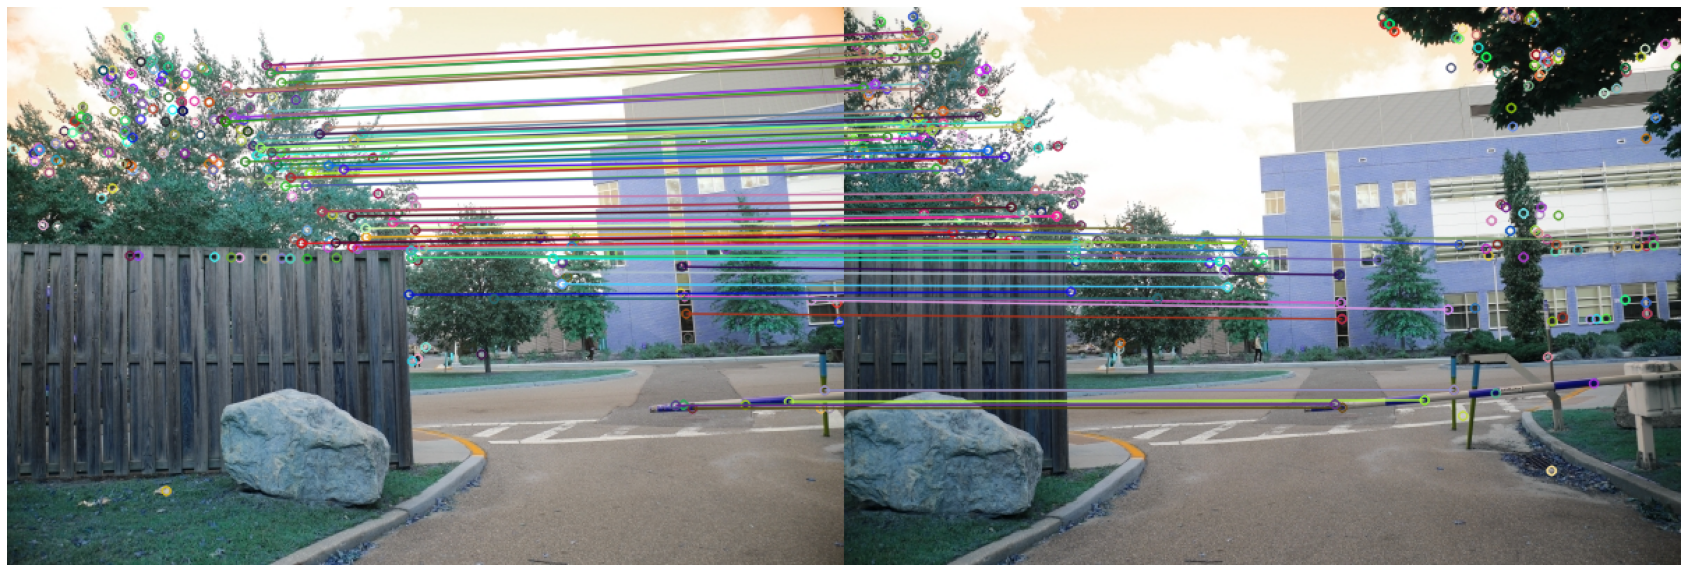

In [ ]:
show_img(a1, figsize=30)

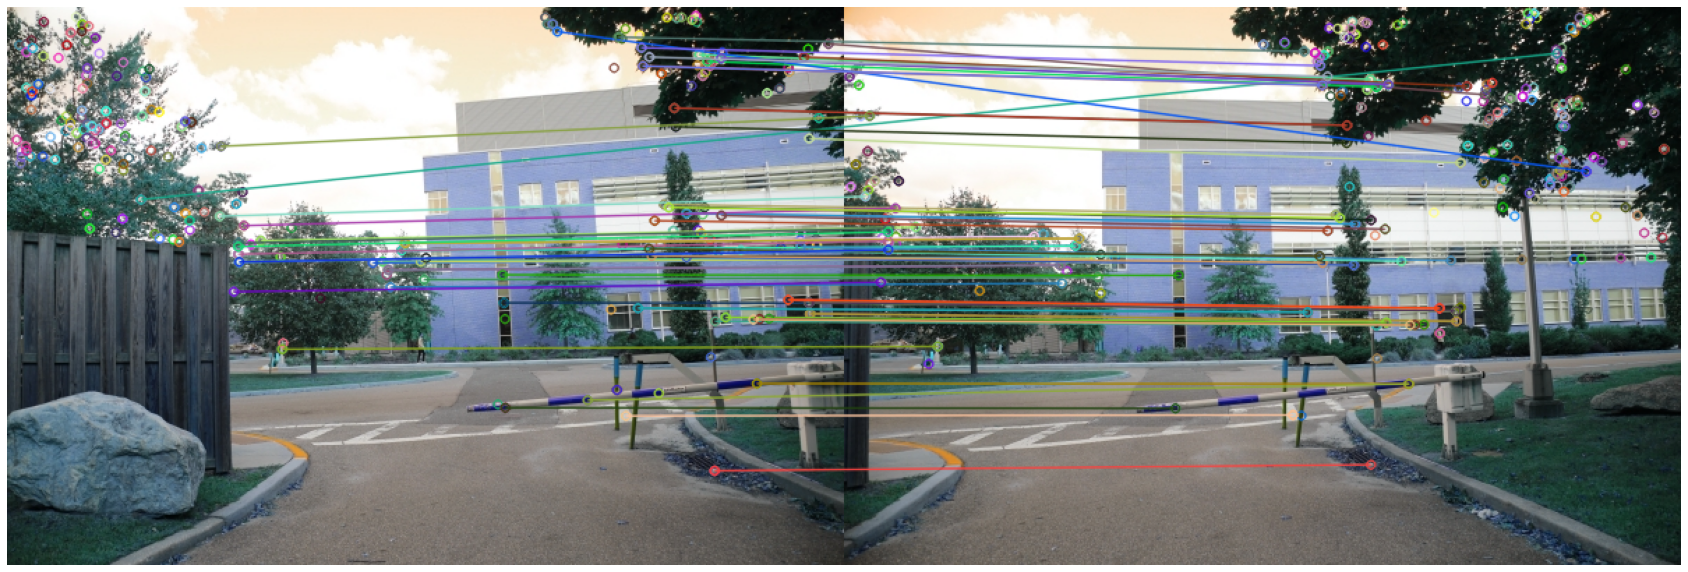

In [ ]:
show_img(a2, figsize=30)

In [ ]:
def wrap(img1,img2,H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    translation_dist = [-x_min, -y_min]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]]) 

    output_img = cv2.warpPerspective(img1, H_translation.dot(H), (x_max-x_min, y_max-y_min))
    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img2
    
    return output_img

def align_size(img1,img2):
    if(img1.shape!=img2.shape):
        maxHeight = img1.shape[0] if img1.shape[0] >= img2.shape[0] else img2.shape[0]
        maxWidth = img1.shape[1] if img1.shape[1] >= img2.shape[1] else img2.shape[1]
        img1 = cv2.copyMakeBorder(img1, 0, maxHeight - img1.shape[0], 0, maxWidth - img1.shape[1], cv2.BORDER_CONSTANT, value=[0,0,0])
        img2 = cv2.copyMakeBorder(img2, 0, maxHeight - img2.shape[0], 0, maxWidth - img2.shape[1], cv2.BORDER_CONSTANT, value=[0,0,0])
    return img1,img2

def stitch(img1,img2):

    img1, img2 = align_size(img1, img2)
    sift = cv2.SIFT_create()
    bf = cv2.BFMatcher()

    kp_1, desc_1 = sift.detectAndCompute(img1, None)
    kp_2, desc_2 = sift.detectAndCompute(img2, None)
    
    matches = bf.knnMatch(desc_1, desc_2, k=2)
    good_matches = []

    for m, n in matches:
        if m.distance < 0.75*n.distance:      
            good_matches.append(m)

    src_pts = np.float32([ kp_1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    wrap_im = wrap(img1, img2, H)
    
    return wrap_im

In [ ]:
def panaroma(images):
    res = images[0]
    for i in range(1, len(images)):

        res = stitch(res, images[i])
    return res

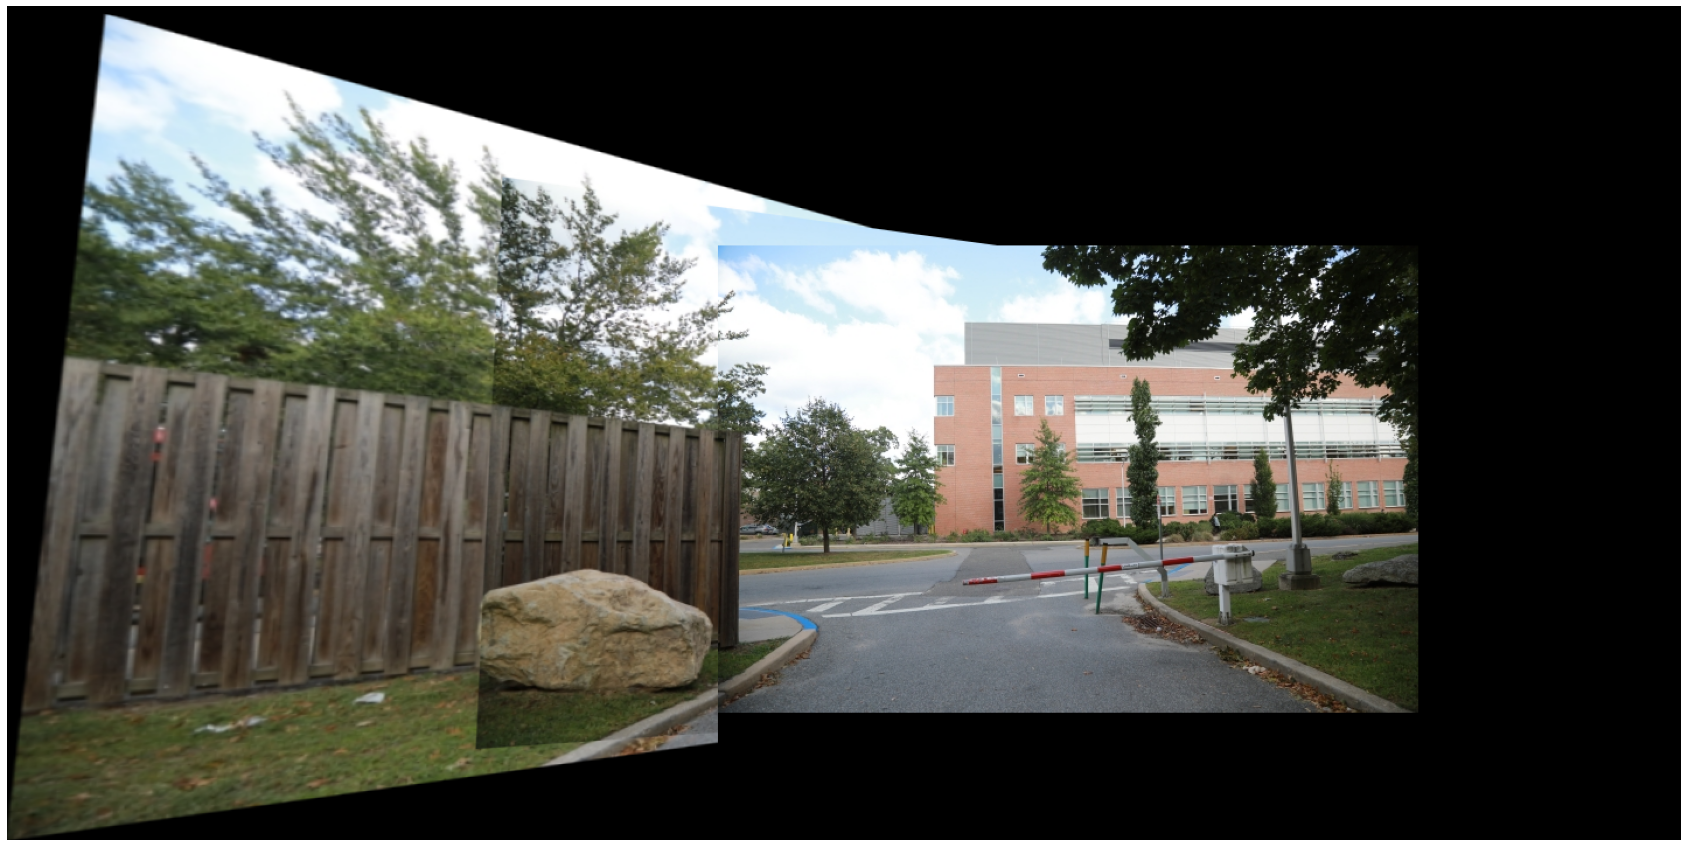

In [ ]:
images = [sl, sm, sr]
res = panaroma(images)
show_img(res, figsize=30, is_gray=False)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14uC3LV-nDbnB6duS_M-_FhptL6X6H1Hr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14uC3LV-nDbnB6duS_M-_FhptL6X6H1Hr" -O ims.zip && rm -rf /tmp/cookies.txt

--2023-02-07 13:04:54--  https://docs.google.com/uc?export=download&confirm=&id=14uC3LV-nDbnB6duS_M-_FhptL6X6H1Hr
Resolving docs.google.com (docs.google.com)... 172.253.115.102, 172.253.115.101, 172.253.115.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/diqt7inckvotd8r6pa15da91mba39bc3/1675775025000/04268100670184909597/*/14uC3LV-nDbnB6duS_M-_FhptL6X6H1Hr?e=download&uuid=e13a576b-5196-449e-ae7a-d1a7ba568f87 [following]
--2023-02-07 13:04:55--  https://doc-14-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/diqt7inckvotd8r6pa15da91mba39bc3/1675775025000/04268100670184909597/*/14uC3LV-nDbnB6duS_M-_FhptL6X6H1Hr?e=download&uuid=e13a576b-5196-449e-ae7a-d1a7ba568f87
Resolving doc-14-8g-docs.googleusercontent.com (doc-14-8g-docs.googleusercontent.com)... 142.251.167.1

In [ ]:
!unzip -n ims.zip

Archive:  ims.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   


In [ ]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img3 = cv2.imread('3.jpg')

In [ ]:
res = panaroma([img3, img2, img1])

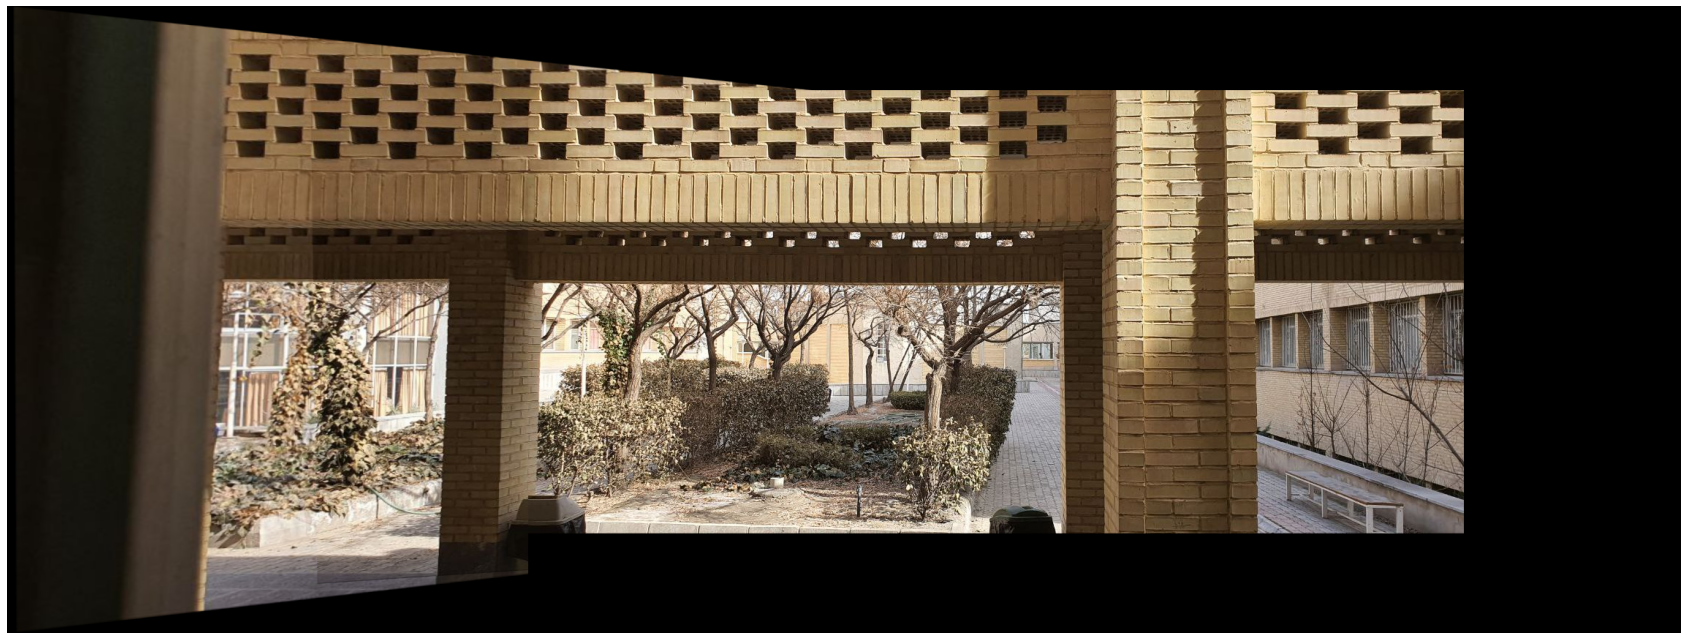

In [ ]:
show_img(res, figsize=30, is_gray=False)